# Final Project
# Sbumitted by om nimmalwar
# Submited Date :- 17/10/2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
df = pd.read_csv("employee_data (1).csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [3]:
# Descriptive statastics

In [8]:
df.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


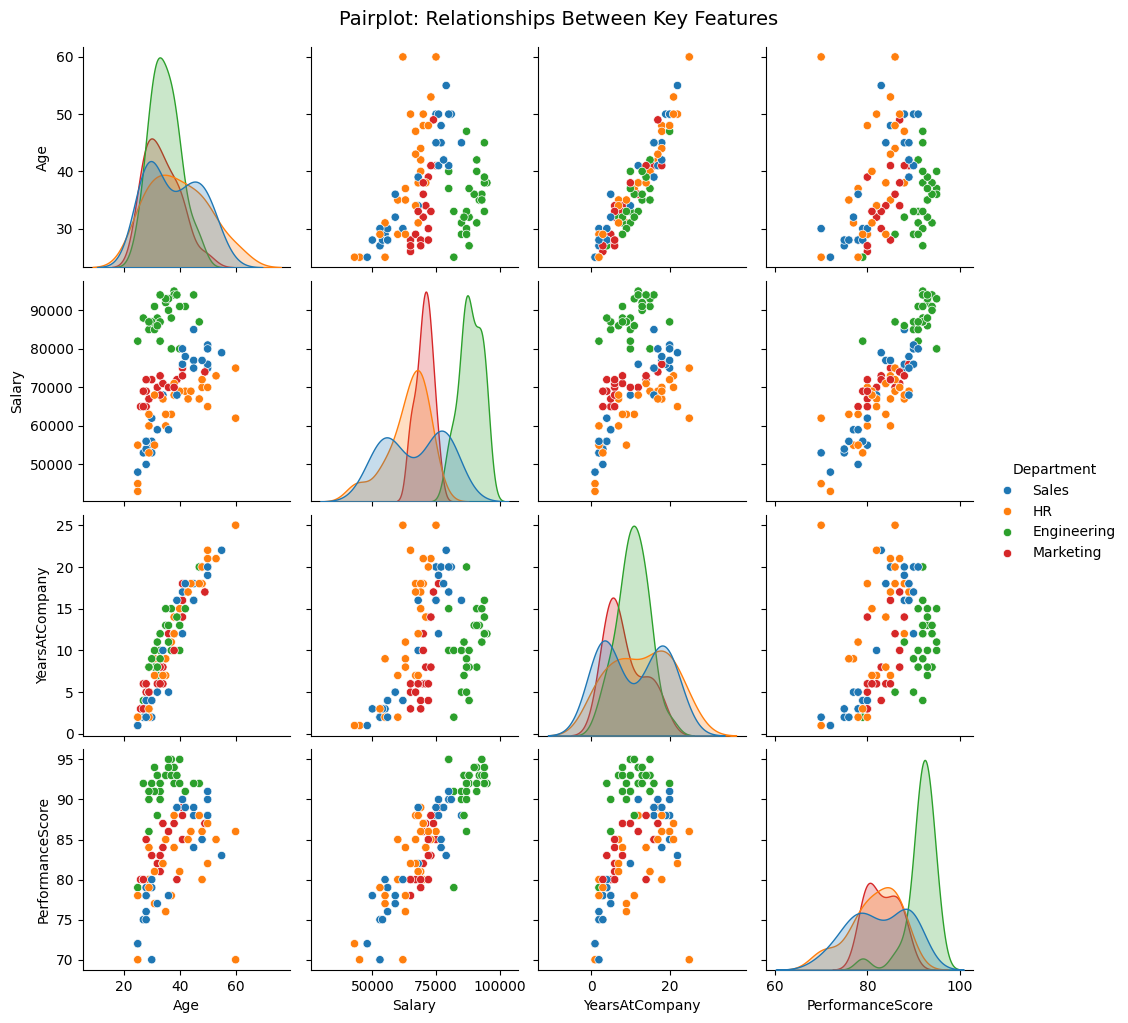

In [9]:
#Visualization
sns.pairplot(df, vars=['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore'], hue='Department')
plt.suptitle("Pairplot: Relationships Between Key Features", y=1.02, fontsize=14)
plt.show()


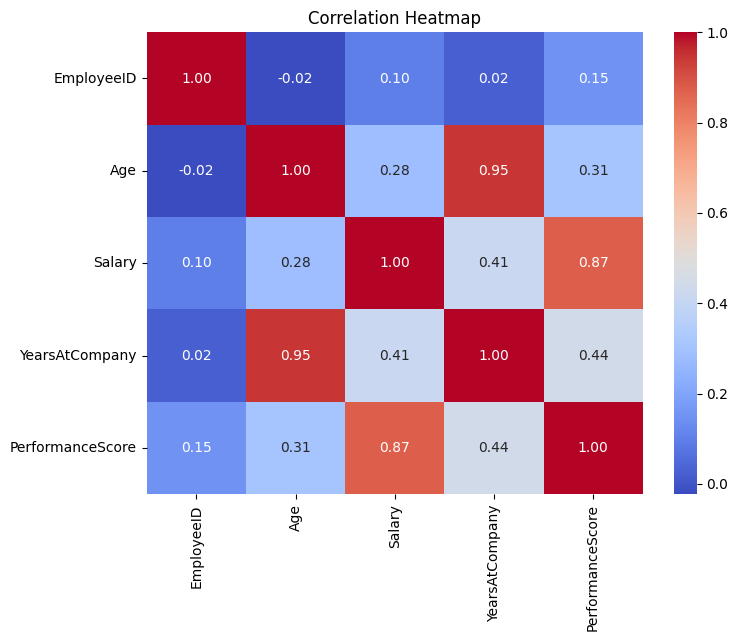

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
#Finding Outliers

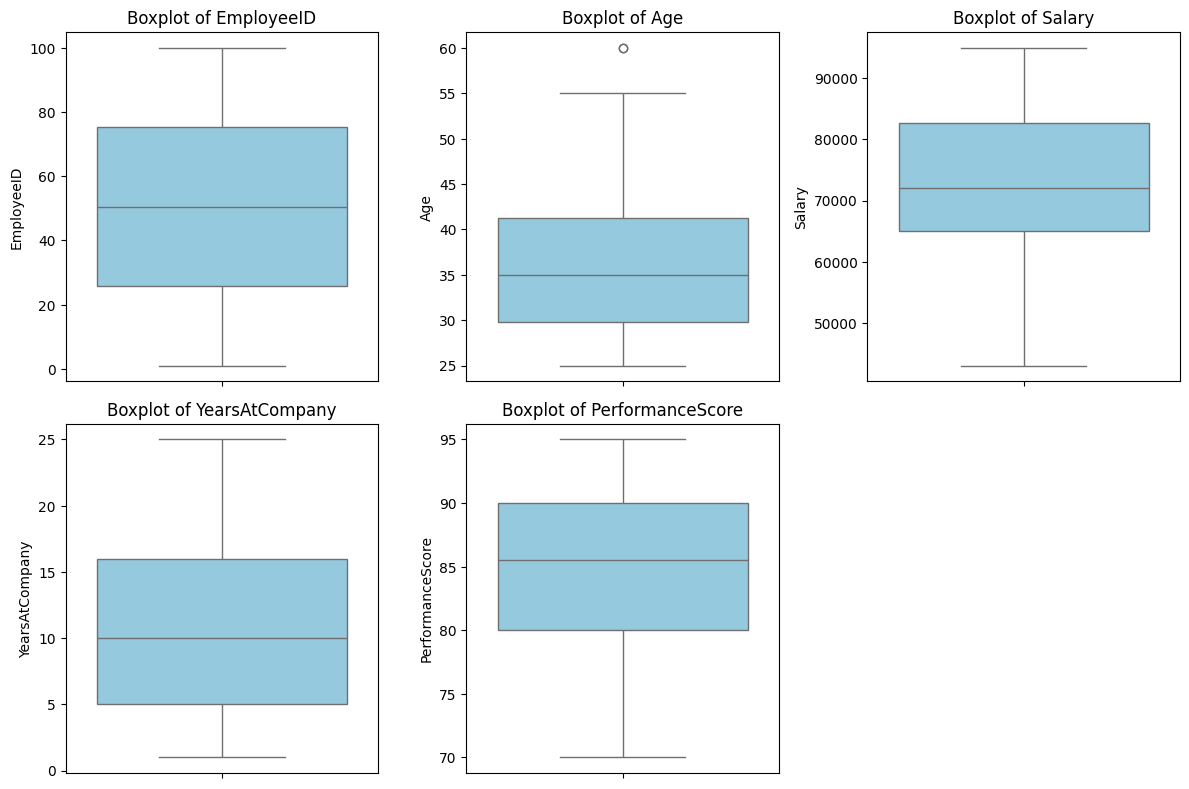

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

** as we seen in above figures we found outlier in age column only **

# Probablity and statastical analysis
Probability of Employee Leaving (Attrition) 

In [13]:
# Convert Attrition column to binary for easier computation
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [14]:
#Overall probability of an employee leaving
p_leave = df['Attrition_Flag'].mean()
print(f"Overall Probability of Attrition (Leaving): {p_leave:.2f}")

Overall Probability of Attrition (Leaving): 0.39


In [16]:
#Probability of leaving by Department
p_leave_by_dept = df.groupby('Department')['Attrition_Flag'].mean()
print("\nProbability of Attrition by Department:\n", p_leave_by_dept)


Probability of Attrition by Department:
 Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition_Flag, dtype: float64


In [18]:
#Probability of leaving by PerformanceScore (binned)
df['Perf_Level'] = pd.cut(df['PerformanceScore'],
                          bins=[0, 70, 80, 90, 100],
                          labels=['Low', 'Average', 'High', 'Excellent'])
p_leave_by_perf = df.groupby('Perf_Level')['Attrition_Flag'].mean()
print("\nProbability of Attrition by Performance Level:\n", p_leave_by_perf)


Probability of Attrition by Performance Level:
 Perf_Level
Low          0.333333
Average      0.259259
High         0.413043
Excellent    0.500000
Name: Attrition_Flag, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_14248\4006593212.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p_leave_by_perf = df.groupby('Perf_Level')['Attrition_Flag'].mean()


Bayes’ Theorem: P(Leave | Performance Level)

In [19]:
P_Leave = p_leave

#Calculate P(Leave | Low Performance)
P_LowPerf = (df['Perf_Level'] == 'Low').mean()
P_LowPerf_and_Leave = ((df['Perf_Level'] == 'Low') & (df['Attrition_Flag'] == 1)).mean()
P_Leave_given_LowPerf = P_LowPerf_and_Leave / P_LowPerf if P_LowPerf > 0 else np.nan

print(f"\nUsing Bayes’ Theorem:")
print(f"P(Leave | Low Performance) = {P_Leave_given_LowPerf:.2f}")
print(f"P(Leave) = {P_Leave:.2f}")
print(f"P(Low Performance) = {P_LowPerf:.2f}")

# We can similarly calculate for other performance levels
for level in df['Perf_Level'].unique():
    if pd.isna(level): continue
    P_perf = (df['Perf_Level'] == level).mean()
    P_perf_and_leave = ((df['Perf_Level'] == level) & (df['Attrition_Flag'] == 1)).mean()
    P_leave_given_perf = P_perf_and_leave / P_perf if P_perf > 0 else np.nan
    print(f"P(Leave | {level} Performance) = {P_leave_given_perf:.2f}")


Using Bayes’ Theorem:
P(Leave | Low Performance) = 0.33
P(Leave) = 0.39
P(Low Performance) = 0.03
P(Leave | Average Performance) = 0.26
P(Leave | High Performance) = 0.41
P(Leave | Excellent Performance) = 0.50
P(Leave | Low Performance) = 0.33


Hypothesis testing

In [25]:
import itertools
from scipy import stats
departments = df['Department'].unique()
dept_perf = {dept: df[df['Department'] == dept]['PerformanceScore'] for dept in departments}

# Create DataFrame to store p-values
p_matrix = pd.DataFrame(np.ones((len(departments), len(departments))),
                        index=departments, columns=departments)

# Perform Z-tests for all department pairs
for dept1, dept2 in itertools.combinations(departments, 2):
    data1 = dept_perf[dept1]
    data2 = dept_perf[dept2]

    mean1, mean2 = data1.mean(), data2.mean()
    std1, std2 = data1.std(), data2.std()
    n1, n2 = len(data1), len(data2)

    # Z-statistic
    z = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
    p = 2 * (1 - stats.norm.cdf(abs(z)))  # two-tailed test

    p_matrix.loc[dept1, dept2] = p
    p_matrix.loc[dept2, dept1] = p

p_matrix_rounded = p_matrix.round(4)

print("🔹 P-Value Matrix for Z-Test between Departments:")
print(p_matrix_rounded)


# Interpretation summary
print("\n✅ Interpretation Guide:")
print("- P-value < 0.05 → Significant difference in mean performance between departments.")
print("- P-value ≥ 0.05 → No significant difference.\n")

🔹 P-Value Matrix for Z-Test between Departments:
              Sales      HR  Engineering  Marketing
Sales        1.0000  0.5386          0.0     0.6294
HR           0.5386  1.0000          0.0     0.1901
Engineering  0.0000  0.0000          1.0     0.0000
Marketing    0.6294  0.1901          0.0     1.0000

✅ Interpretation Guide:
- P-value < 0.05 → Significant difference in mean performance between departments.
- P-value ≥ 0.05 → No significant difference.



In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
# Select numerical columns tZo scale
num_features = ['Salary', 'PerformanceScore', 'Age', 'YearsAtCompany']

# Option 1: Min-Max Scaling (values between 0 and 1)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_features] = minmax_scaler.fit_transform(df_minmax[num_features])
cat_features = ['Department', 'Attrition']
print("✅ Numerical Features Scaled Successfully.")
print("\nMin-Max Scaled Sample:")
print(df_minmax[num_features].head())

# Initialize Label Encoder
le = LabelEncoder()

# Apply encoding
for col in cat_features:
    df_minmax[col] = le.fit_transform(df_minmax[col])

print("\n✅ Categorical Features Encoded Successfully.")
print("\nEncoded Columns Preview:")
print(df_minmax[cat_features].head())

✅ Numerical Features Scaled Successfully.

Min-Max Scaled Sample:
     Salary  PerformanceScore       Age  YearsAtCompany
0  0.230769              0.40  0.114286        0.083333
1  0.326923              0.60  0.285714        0.250000
2  0.711538              1.00  0.428571        0.375000
3  0.423077              0.32  0.085714        0.166667
4  0.615385              0.72  0.714286        0.791667

✅ Categorical Features Encoded Successfully.

Encoded Columns Preview:
   Department  Attrition
0           3          0
1           1          0
2           0          1
3           2          0
4           3          1


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# 1️⃣ Prepare Dataset
#df_model = df.drop(['Name', 'EmployeeID'],axis = 1, inplace = True)  # drop identifiers

# Encode target column
le_attr = LabelEncoder()
df['Attrition'] = le_attr.fit_transform(df['Attrition'])  # 0 = No, 1 = Yes
df['Department'] = le.fit_transform(df['Department'])
# Encode all object-type features
x = df.drop('Attrition', axis=1)

# 2️⃣ Features and Target
y = df['Attrition']

# 3️⃣ Split into Train/Test (70/30)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3
)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

x_train

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy of pridiction model :",accuracy_score(y_test,y_pred))

Accuracy of pridiction model : 0.5333333333333333


Training samples: 70, Testing samples: 30
R-squared (R²): 0.7928
Mean Squared Error (MSE): 10.4675


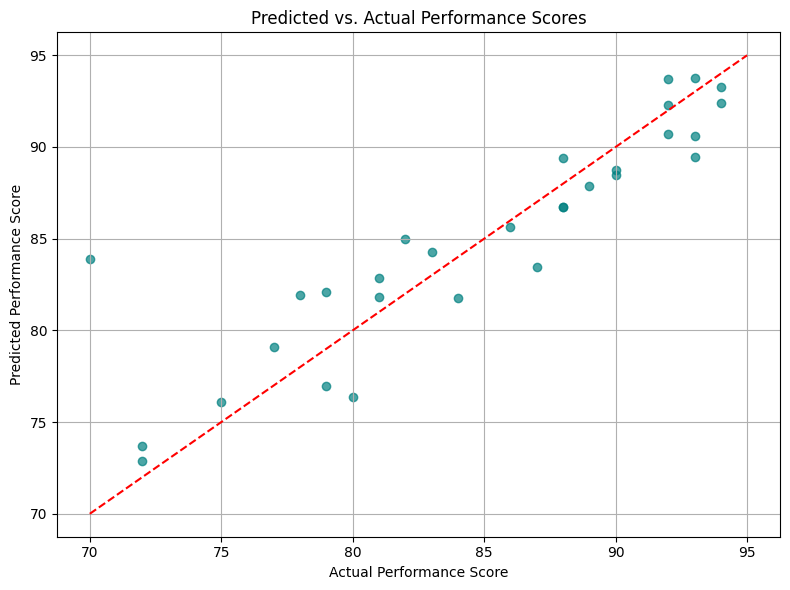

In [67]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# 2️⃣ Features and Target
X = df_encoded.drop('PerformanceScore', axis=1)
y = df_encoded['PerformanceScore']

# 3️⃣ Split into Train/Test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# 4️⃣ Train Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

# 5️⃣ Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 6️⃣ Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs. Actual Performance Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Mean Squared Error (MSE): 594.9108
R-squared (R²): -19.3388


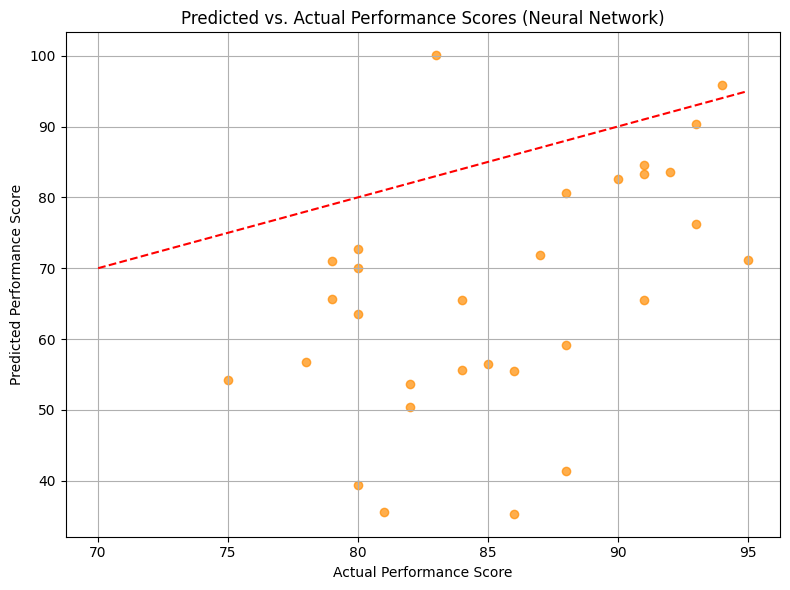

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and Target
X = df_encoded.drop('PerformanceScore', axis=1)
y = df_encoded['PerformanceScore']

#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train Model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

#  Evaluate Model
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

#  Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='darkorange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs. Actual Performance Scores (Neural Network)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:

df_encoded = pd.get_dummies(df, drop_first=True)

# Features and Target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Model
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Accuracy: 0.5667
Precision: 0.4615
Recall: 0.5000
F1-Score: 0.4800
